In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from scipy.stats import entropy
from sklearn.decomposition import PCA

In [221]:
data_2015 = pd.read_csv("data/2015.csv")
data_2019 = pd.read_csv("data/2019.csv")

In [222]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [223]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [224]:
def map_columns(df, column_mapping):
    res = pd.DataFrame([])
    for key, val in column_mapping.items():
        print(key, val)
        res[key] = df[val]
    
    return res

In [225]:
column_mapping_2015 = {
    "country": "Country",
    "score": "Happiness Score",
    "gdp_per_capita": "Economy (GDP per Capita)",
    "family": "Family",
    "life_expectancy": "Health (Life Expectancy)",
    "freedom": "Freedom",
    "corruption": "Trust (Government Corruption)",
    "generosity": "Generosity",
    "dystopia_residual": "Dystopia Residual"
}

data_2015 = map_columns(data_2015, column_mapping_2015)
data_2015.head()

country Country
score Happiness Score
gdp_per_capita Economy (GDP per Capita)
family Family
life_expectancy Health (Life Expectancy)
freedom Freedom
corruption Trust (Government Corruption)
generosity Generosity
dystopia_residual Dystopia Residual


,country,score,gdp_per_capita,family,life_expectancy,freedom,corruption,generosity,dystopia_residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [226]:
column_mapping_2019 = {
    "country": "Country or region",
    "score": "Score",
    "gdp_per_capita": "GDP per capita",
    "social_support": "Social support",
    "life_expectancy": "Healthy life expectancy",
    "freedom": "Freedom to make life choices",
    "corruption": "Perceptions of corruption",
    "generosity": "Generosity",
}

data_2019 = map_columns(data_2019, column_mapping_2019)
data_2019.head()

country Country or region
score Score
gdp_per_capita GDP per capita
social_support Social support
life_expectancy Healthy life expectancy
freedom Freedom to make life choices
corruption Perceptions of corruption
generosity Generosity


,country,score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [227]:
import numpy as np

data_2015["year"] = 2015
data_2019["year"] = 2019

print(f"Shape of 2015: {data_2015.shape}")
print(f"Shape of 2019: {data_2019.shape}")

data_merged = pd.concat([data_2015, data_2019])
print(f"Shape of merged: {data_merged.shape}")

data_merged = data_merged.replace(np.nan, None)

data_merged.head()

Shape of 2015: (158, 10)
Shape of 2019: (156, 9)
Shape of merged: (314, 11)


,country,score,gdp_per_capita,family,life_expectancy,freedom,corruption,generosity,dystopia_residual,year,social_support
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,None
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,None
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,None
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,None
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,None


In [228]:
data_merged.isnull().sum()

country                0
score                  0
gdp_per_capita         0
family               156
life_expectancy        0
freedom                0
corruption             0
generosity             0
dystopia_residual    156
year                   0
social_support       158
dtype: int64

In [229]:
data_merged.dtypes

country               object
score                float64
gdp_per_capita       float64
family                object
life_expectancy      float64
freedom              float64
corruption           float64
generosity           float64
dystopia_residual     object
year                   int64
social_support        object
dtype: object

In [230]:
data_merged['year'] = data_merged.year.astype("category")
data_merged.dtypes

country                object
score                 float64
gdp_per_capita        float64
family                 object
life_expectancy       float64
freedom               float64
corruption            float64
generosity            float64
dystopia_residual      object
year                 category
social_support         object
dtype: object

In [231]:
def box_plot_distributions(df):
    column_names = ["score", "gdp_per_capita", "family", "social_support", "life_expectancy", "freedom", "corruption", "generosity", "dystopia_residual"]
        
    plt.figure(figsize=(15, 60))
    
    for idx, feature in enumerate(column_names, 1):
        plt.subplot(len(column_names), 2, 2*idx-1)
        sns.histplot(data=df[df[feature].notnull()], x=feature, hue="year")
        plt.title(f"{feature}")
        
        plt.subplot(len(column_names), 2, 2*idx)
        sns.boxplot(data=df[df[feature].notnull()], x="year", y=feature, hue="year")
        plt.title(f"{feature}")
        
    plt.show()

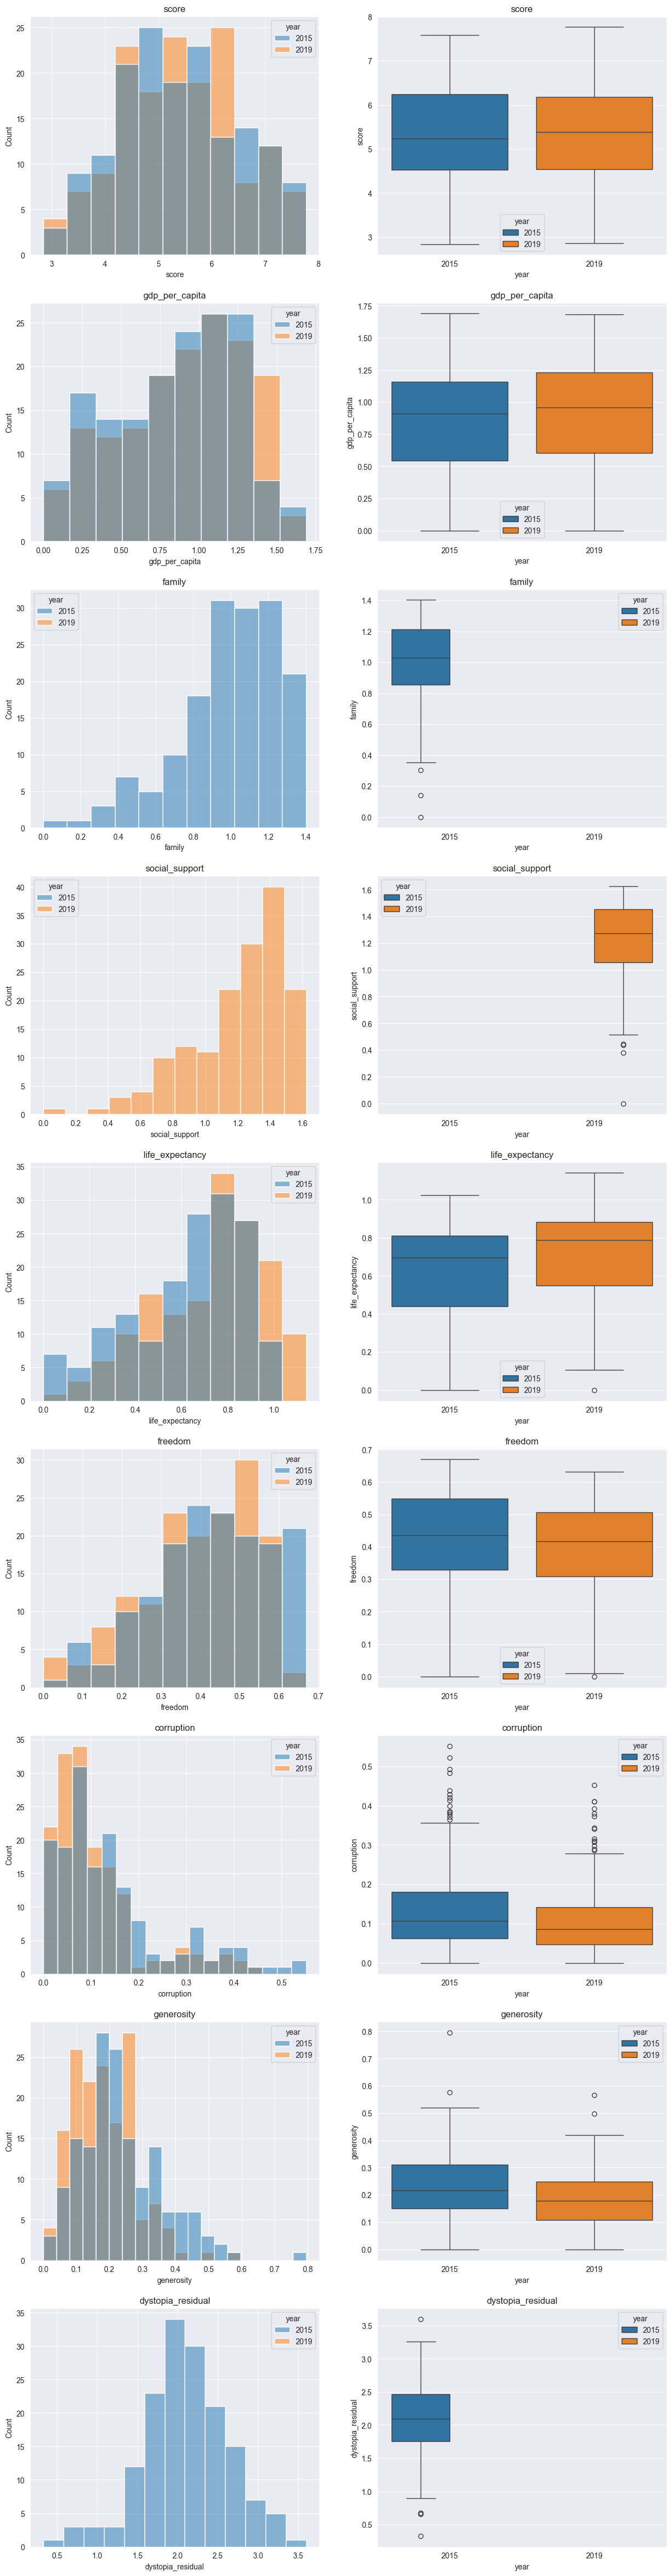

In [232]:
box_plot_distributions(data_merged)

In [233]:
def summarize_data(df):
    column_names = ["score", "gdp_per_capita", "family", "social_support", "life_expectancy", "freedom", "corruption", "generosity", "dystopia_residual"]
    
    for column_name in column_names:
        print(f"Summary of {column_name}")
        print(df.groupby("year", observed=False)[column_name].describe())
        print("\n")

In [234]:
summarize_data(data_merged)

Summary of score
      count      mean      std    min     25%     50%      75%    max
year                                                                 
2015  158.0  5.375734  1.14501  2.839  4.5260  5.2325  6.24375  7.587
2019  156.0  5.407096  1.11312  2.853  4.5445  5.3795  6.18450  7.769


Summary of gdp_per_capita
      count      mean       std  min       25%       50%       75%      max
year                                                                       
2015  158.0  0.846137  0.403121  0.0  0.545808  0.910245  1.158448  1.69042
2019  156.0  0.905147  0.398389  0.0  0.602750  0.960000  1.232500  1.68400


Summary of family
      count unique      top freq
year                            
2015  158.0  158.0  1.34951  1.0
2019      0      0      NaN  NaN


Summary of social_support
      count unique    top freq
year                          
2015      0      0    NaN  NaN
2019  156.0  145.0  1.465  3.0


Summary of life_expectancy
      count      mean       std  min  

In [235]:
def scatter_plot(df):
    column_names = ["gdp_per_capita", "family", "social_support", "life_expectancy", "freedom", "corruption",
                    "generosity", "dystopia_residual"]

    plt.figure(figsize=(15, 50))
    
    for idx, feature in enumerate(column_names, 1):
        plt.subplot(len(column_names), 2, idx)
        sns.scatterplot(data=df[df[feature].notnull()], x=feature, y="score", hue="year")
        plt.title(f"happiness score vs. {feature}")
    
    plt.show()

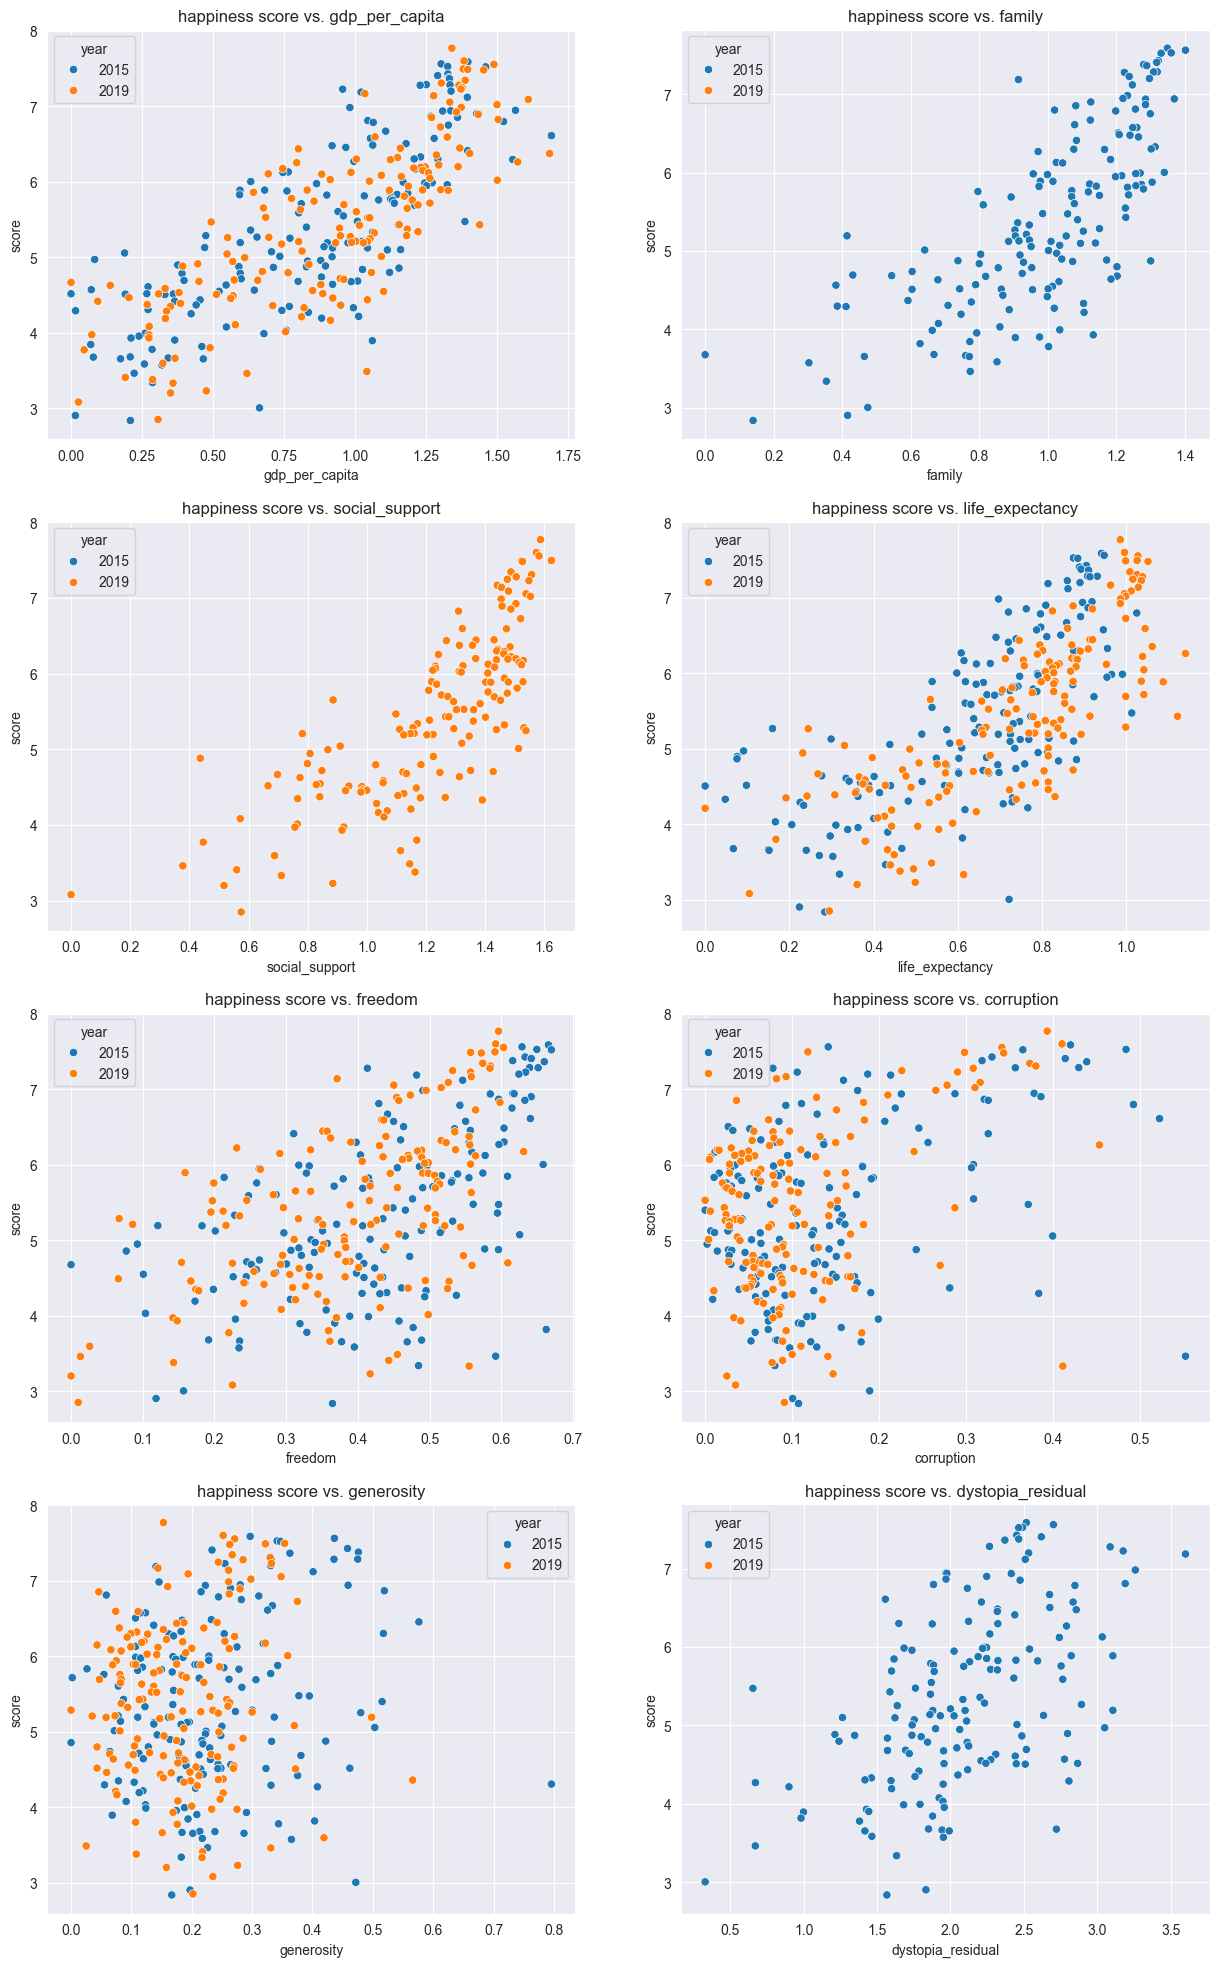

In [236]:
scatter_plot(data_merged)

,score,gdp_per_capita,family,life_expectancy,freedom,corruption,generosity,dystopia_residual,social_support
score,1.000000,0.786038,0.740605,0.739920,0.561481,0.382392,0.128658,0.530474,0.777058
gdp_per_capita,0.786038,1.000000,0.645299,0.822400,0.361661,0.286737,-0.055060,0.040059,0.754906
family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,NaN
life_expectancy,0.739920,0.822400,0.531104,1.000000,0.341783,0.230385,0.003999,0.018979,0.719009
freedom,0.561481,0.361661,0.441518,0.341783,1.000000,0.477820,0.345400,0.062783,0.447333
corruption,0.382392,0.286737,0.205605,0.230385,0.477820,1.000000,0.317965,-0.033105,0.181899
generosity,0.128658,-0.055060,0.087513,0.003999,0.345400,0.317965,1.000000,-0.101301,-0.048126
dystopia_residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,NaN
social_support,0.777058,0.754906,NaN,0.719009,0.447333,0.181899,-0.048126,NaN,1.000000


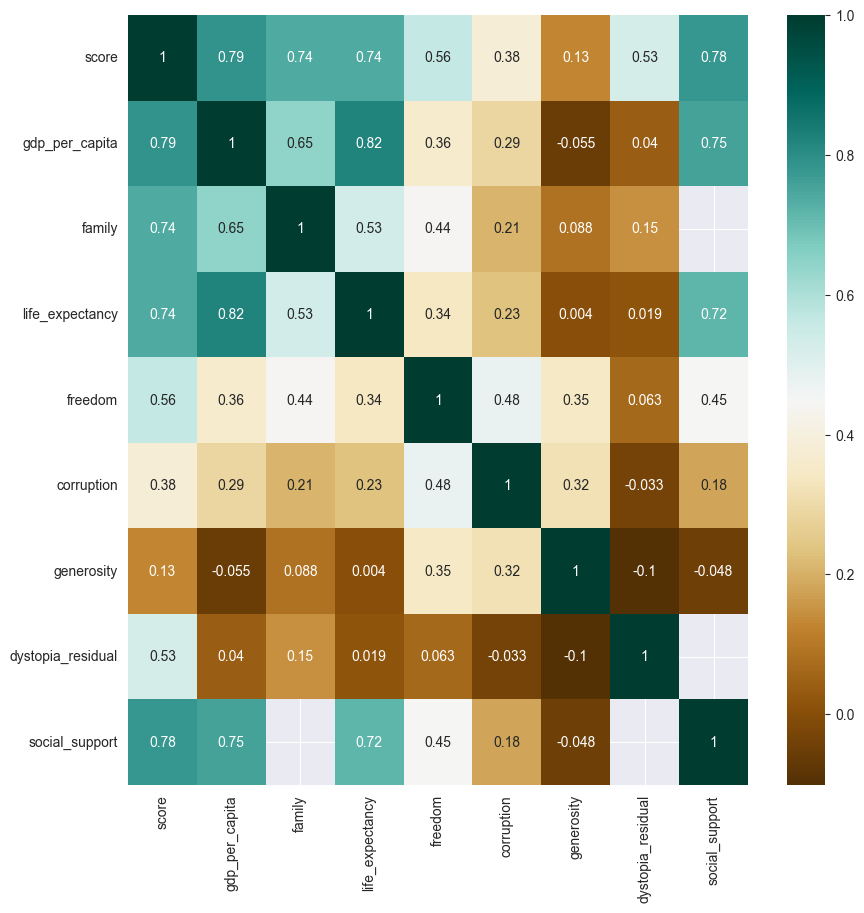

In [237]:
plt.figure(figsize = (10,10))
c= data_merged.drop(["country", "year"], axis=1).corr()
sns.heatmap(c, cmap="BrBG", annot=True)

c

In [238]:
data_merged.to_csv("data/combined.csv", index=False)

In [239]:
data = pd.read_csv("data/combined.csv")
data.head()

,country,score,gdp_per_capita,family,life_expectancy,freedom,corruption,generosity,dystopia_residual,year,social_support
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN


In [240]:
def standardize(df, column_names):
    for column in column_names:
        df[column] = (df[column] - df[column].mean()) / df[column].std()

    return df

In [241]:
data_2015 = data[data['year'] == 2015][
    ["country", "score", "gdp_per_capita", "family", "life_expectancy", "freedom", "generosity", "corruption",
     "dystopia_residual"]]
data_2015 = standardize(data_2015,
                        ["gdp_per_capita", "family", "life_expectancy", "freedom", "generosity", "corruption",
                         "dystopia_residual"])

data_2015 = data_2015.rename(columns={"family": "social_support"})
data_2015 = data_2015.drop(columns=["dystopia_residual"])
data_2015.describe()

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
count,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,5.375734,-2.248553e-16,-3.147974e-16,-1.798842e-16,1.349132e-16,2.360981e-16,8.994212e-17
std,1.145010,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.839000,-2.098967e+00,-3.638614e+00,-2.550854e+00,-2.844296e+00,-1.873115e+00,-1.194843e+00
25%,4.526000,-7.450117e-01,-4.927999e-01,-7.733370e-01,-6.654926e-01,-6.847145e-01,-6.810303e-01
50%,5.232500,1.590287e-01,1.412203e-01,2.689260e-01,4.578894e-02,-1.670720e-01,-3.015963e-01
75%,6.243750,7.747313e-01,8.200602e-01,7.315637e-01,7.994913e-01,5.729726e-01,3.068559e-01
max,7.587000,2.094367e+00,1.509658e+00,1.598649e+00,1.600044e+00,4.409242e+00,3.403102e+00


In [242]:
data_2019 = data[data['year'] == 2019][
    ["country", "score", "gdp_per_capita", "social_support", "life_expectancy", "freedom", "generosity", "corruption"]]
data_2019 = standardize(data_2019,
                        ["gdp_per_capita", "social_support", "life_expectancy", "freedom", "generosity", "corruption"])
data_2019.describe()

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,5.407096,-1.821904e-16,-1.366428e-16,-3.188333e-16,-2.732857e-16,2.120811e-16,-1.138690e-16
std,1.113120,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.853000,-2.272016e+00,-4.040270e+00,-2.995340e+00,-2.739702e+00,-1.940552e+00,-1.169929e+00
25%,4.544500,-7.590498e-01,-5.115926e-01,-7.330690e-01,-5.902074e-01,-7.988725e-01,-6.727736e-01
50%,5.379500,1.376858e-01,2.095177e-01,2.633213e-01,1.704905e-01,-7.712138e-02,-2.655293e-01
75%,6.184500,8.216898e-01,8.144816e-01,6.463895e-01,8.003344e-01,6.656261e-01,3.241817e-01
max,7.769000,1.955003e+00,1.387693e+00,1.717122e+00,1.663971e+00,4.001429e+00,3.621803e+00


In [243]:
data_2015.to_csv("data/2015_processed.csv", index=False)
data_2019.to_csv("data/2019_processed.csv", index=False)

In [244]:
data = pd.read_csv("data/2015_processed.csv")
data.describe()

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
count,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,5.375734,-2.248553e-16,-2.698264e-16,-2.248553e-16,1.349132e-16,2.698264e-16,8.994212e-17
std,1.145010,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.839000,-2.098967e+00,-3.638614e+00,-2.550854e+00,-2.844296e+00,-1.873115e+00,-1.194843e+00
25%,4.526000,-7.450117e-01,-4.927999e-01,-7.733370e-01,-6.654926e-01,-6.847145e-01,-6.810303e-01
50%,5.232500,1.590287e-01,1.412203e-01,2.689260e-01,4.578894e-02,-1.670720e-01,-3.015963e-01
75%,6.243750,7.747313e-01,8.200602e-01,7.315637e-01,7.994913e-01,5.729726e-01,3.068559e-01
max,7.587000,2.094367e+00,1.509658e+00,1.598649e+00,1.600044e+00,4.409242e+00,3.403102e+00


In [245]:
data_features = data.drop("country", axis=1)

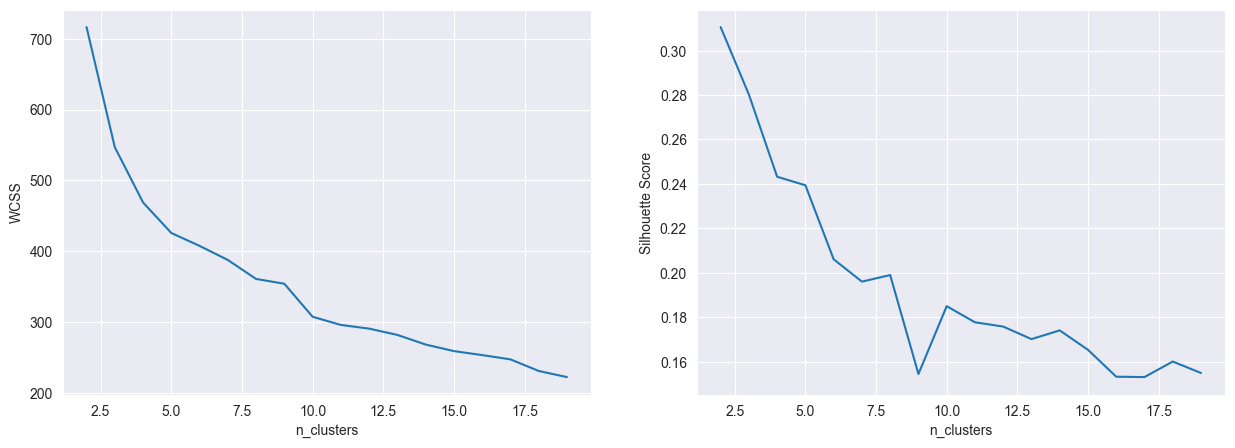

In [246]:
wcss = []
silhouette_scores = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=11)
    kmeans.fit(data_features)

    wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(data_features, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss)
plt.xlabel('n_clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [247]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=11)
kmeans.fit(data_features)

KMeans(n_clusters=5, random_state=11)

In [248]:
centroids = kmeans.cluster_centers_
centroids

array([[ 6.22905405e+00,  7.07391311e-01,  6.37350566e-01,
         6.77225605e-01,  3.01798440e-01, -4.20415984e-01,
        -1.34436582e-01],
       [ 4.17969565e+00, -1.18389764e+00, -9.35197086e-01,
        -1.25288145e+00, -5.16087014e-01, -5.60742858e-02,
        -1.57861775e-01],
       [ 5.01933333e+00,  2.09350890e-01, -1.87523654e-01,
         2.65004393e-01, -9.54796863e-01, -7.91685278e-01,
        -6.44509057e-01],
       [ 5.29420000e+00, -3.63555349e-01,  2.04832536e-01,
         6.54178293e-04,  7.78435173e-01,  1.05137990e+00,
        -1.25146427e-01],
       [ 7.05013636e+00,  1.30219729e+00,  9.78578403e-01,
         1.08258958e+00,  1.29604788e+00,  1.05603749e+00,
         1.63670557e+00]])

In [249]:
centroids_df = pd.DataFrame(centroids, columns=data_features.columns)
centroids_df.to_csv("data/centroids_2015.csv", index=False)

In [250]:
clusters = data["country"]
membership = pd.Series(kmeans.labels_, name="membership")
clusters = pd.concat([clusters, membership], axis=1)

clusters

,country,membership
0,Switzerland,4
1,Iceland,4
2,Denmark,4
3,Norway,4
4,Canada,4
...,...,...
153,Rwanda,1
154,Benin,1
155,Syria,1
156,Burundi,1


In [251]:
clusters["membership"].value_counts()

membership
1    46
0    37
2    33
4    22
3    20
Name: count, dtype: int64

In [252]:
clusters.to_csv("data/clusters_2015.csv", index=False)

In [253]:
data = pd.read_csv("data/2019_processed.csv")
data.describe()

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,5.407096,-1.821904e-16,-1.366428e-16,-3.188333e-16,-2.732857e-16,2.135044e-16,-9.109522e-17
std,1.113120,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.853000,-2.272016e+00,-4.040270e+00,-2.995340e+00,-2.739702e+00,-1.940552e+00,-1.169929e+00
25%,4.544500,-7.590498e-01,-5.115926e-01,-7.330690e-01,-5.902074e-01,-7.988725e-01,-6.727736e-01
50%,5.379500,1.376858e-01,2.095177e-01,2.633213e-01,1.704905e-01,-7.712138e-02,-2.655293e-01
75%,6.184500,8.216898e-01,8.144816e-01,6.463895e-01,8.003344e-01,6.656261e-01,3.241817e-01
max,7.769000,1.955003e+00,1.387693e+00,1.717122e+00,1.663971e+00,4.001429e+00,3.621803e+00


In [254]:
data_features = data.drop("country", axis=1)

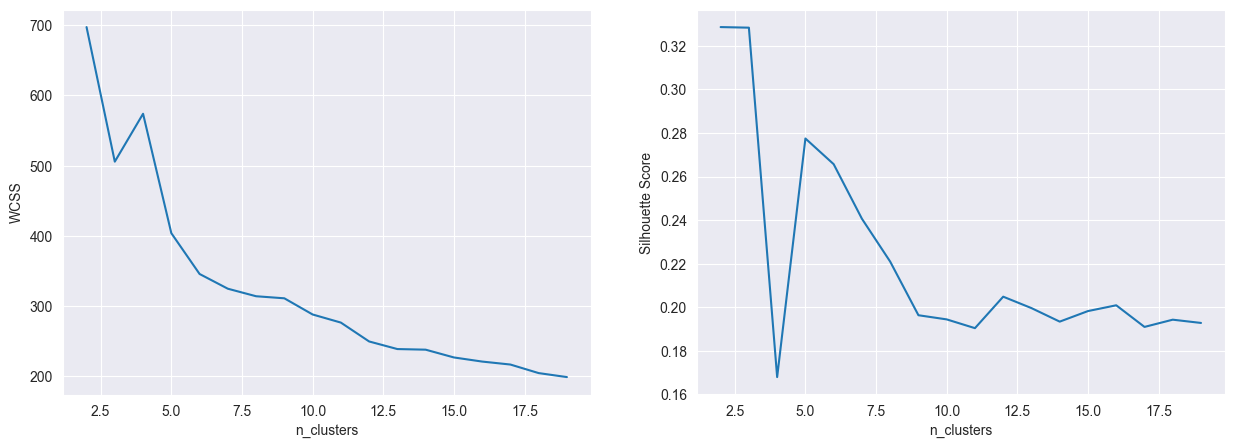

In [255]:
wcss = []
silhouette_scores = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=123)
    kmeans.fit(data_features)

    wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(data_features, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss)
plt.xlabel('n_clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [256]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=123)
kmeans.fit(data_features)

KMeans(n_clusters=5, random_state=123)

In [257]:
centroids = kmeans.cluster_centers_
centroids

array([[ 5.07625   , -0.29766082, -0.15375309, -0.04282347,  0.58180819,
         1.29945487, -0.35213482],
       [ 5.82009091,  0.45966399,  0.53742172,  0.50612203, -0.0629848 ,
        -0.58294366, -0.42018919],
       [ 3.537     , -1.55224345, -2.31562171, -1.58748655, -2.03309086,
         0.67612434, -0.1941293 ],
       [ 4.3795814 , -0.96378399, -0.84833355, -1.05149605, -0.32127712,
        -0.22006778, -0.15298668],
       [ 7.0236087 ,  1.2298004 ,  0.95624052,  1.09544974,  1.08381343,
         0.94508362,  1.80426544]])

In [258]:
centroids_df = pd.DataFrame(centroids, columns=data_features.columns)
centroids_df.to_csv("data/centroids_2019.csv", index=False)

In [259]:
clusters = data["country"]
membership = pd.Series(kmeans.labels_, name="membership")
clusters = pd.concat([clusters, membership], axis=1)

clusters

,country,membership
0,Finland,4
1,Denmark,4
2,Norway,4
3,Iceland,4
4,Netherlands,4
...,...,...
151,Rwanda,3
152,Tanzania,3
153,Afghanistan,2
154,Central African Republic,2


In [260]:
clusters["membership"].value_counts()

membership
1    66
3    43
4    23
0    16
2     8
Name: count, dtype: int64

In [261]:
clusters.to_csv("data/clusters_2019.csv", index=False)

In [262]:
centroids_2015 = pd.read_csv('data/centroids_2015.csv')
centroids_2019 = pd.read_csv('data/centroids_2019.csv')

In [263]:
distances = cdist(centroids_2015, centroids_2019, metric='euclidean')
distances

array([[2.56264636, 0.71345532, 5.73234181, 3.4406131 , 2.72314757],
       [2.59705518, 3.34762594, 2.32486556, 0.44874737, 5.51524405],
       [2.6787504 , 1.47538947, 4.09647113, 2.21924744, 4.49722887],
       [0.57796656, 2.18778791, 4.62880825, 2.49793954, 3.33466837],
       [3.67823042, 3.39320693, 7.2835757 , 5.25410762, 0.30338082]])

In [264]:
best_matching = distances.argmin(axis=1)
for i in range(len(best_matching)):
    print(
        f"Centroid {i} from 2015 matches with centroid {best_matching[i]} from 2019 (distance: {distances[i][best_matching[i]]})")

Centroid 0 from 2015 matches with centroid 1 from 2019 (distance: 0.7134553196087583)
Centroid 1 from 2015 matches with centroid 3 from 2019 (distance: 0.44874737276765425)
Centroid 2 from 2015 matches with centroid 1 from 2019 (distance: 1.4753894689012388)
Centroid 3 from 2015 matches with centroid 0 from 2019 (distance: 0.5779665557262932)
Centroid 4 from 2015 matches with centroid 4 from 2019 (distance: 0.3033808227943236)


In [265]:
clusters_2015 = pd.read_csv('data/clusters_2015.csv')
clusters_2019 = pd.read_csv('data/clusters_2019.csv')

clusters_combined = pd.merge(clusters_2015, clusters_2019, left_on='country', right_on='country',
                             suffixes=('_2015', '_2019'))
clusters_combined

,country,membership_2015,membership_2019
22,Singapore,4,4


In [266]:
clusters_2015['membership'] = clusters_2015['membership'].apply(lambda x: best_matching[int(x)])

In [267]:
clusters_matched = clusters_2015.merge(clusters_2019, left_on='country', right_on='country',
                                       suffixes=('_2015', '_2019'))
clusters_matched

,country,membership_2015,membership_2019
22,Singapore,4,4


<Axes: title={'center': 'Cluster Membership 2019'}, xlabel='membership_2019', ylabel='Count'>

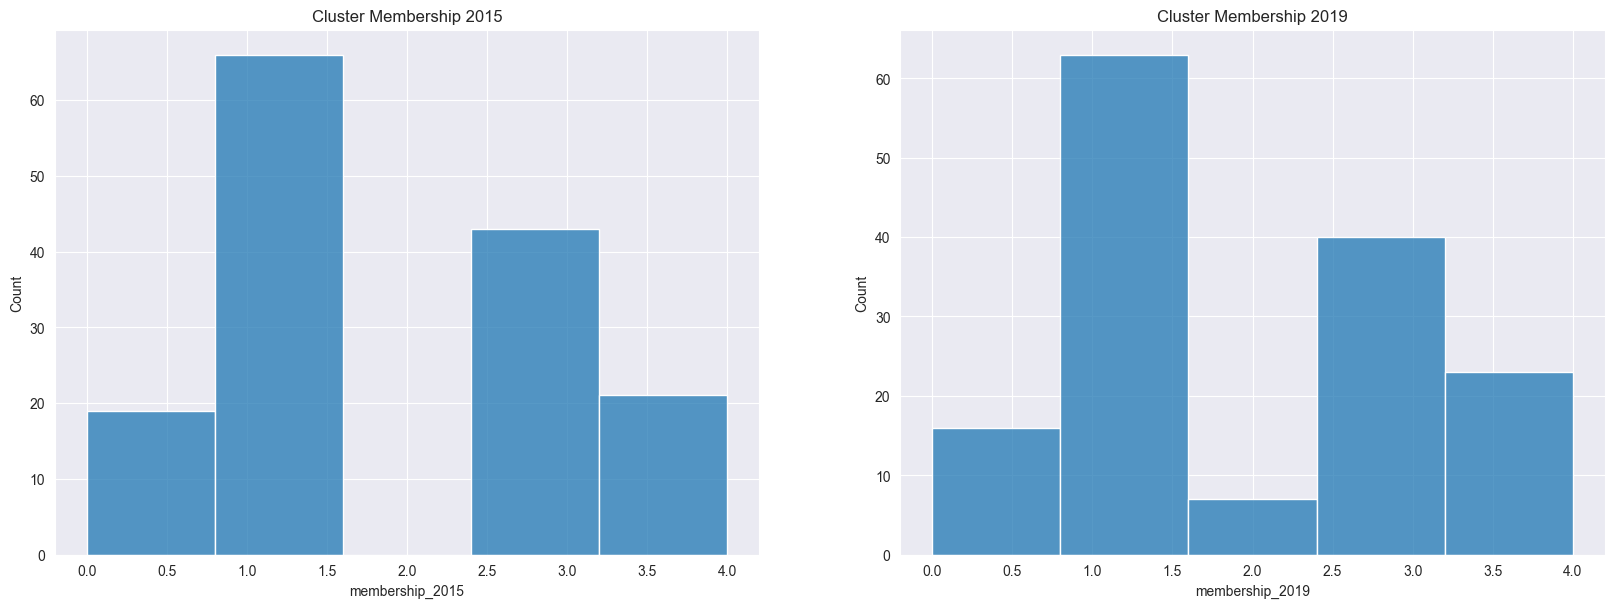

In [268]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('Cluster Membership 2015')
sns.histplot(clusters_matched['membership_2015'], bins=5)

plt.subplot(2, 2, 2)
plt.title('Cluster Membership 2019')
sns.histplot(clusters_matched['membership_2019'], bins=5)

In [269]:
change_count = 0

for i in range(len(clusters_matched)):
    if clusters_matched['membership_2015'][i] != clusters_matched['membership_2019'][i]:
        print(
            f"{clusters_matched['country'][i]} has different memberships: {clusters_matched['membership_2015'][i]} (2015) vs {clusters_matched['membership_2019'][i]} (2019)")

        change_count += 1

print(f"\nTotal number of cluster membership changes: {change_count}")

Belgium has different memberships: 1 (2015) vs 4 (2019)
Guatemala has different memberships: 0 (2015) vs 1 (2019)
Uzbekistan has different memberships: 0 (2015) vs 4 (2019)
Bolivia has different memberships: 0 (2015) vs 1 (2019)
Paraguay has different memberships: 0 (2015) vs 1 (2019)
Nicaragua has different memberships: 0 (2015) vs 1 (2019)
Kosovo has different memberships: 1 (2015) vs 0 (2019)
Mauritius has different memberships: 0 (2015) vs 1 (2019)
Vietnam has different memberships: 0 (2015) vs 1 (2019)
Philippines has different memberships: 0 (2015) vs 1 (2019)
Morocco has different memberships: 1 (2015) vs 3 (2019)
Albania has different memberships: 1 (2015) vs 0 (2019)
Dominican Republic has different memberships: 0 (2015) vs 1 (2019)
Mongolia has different memberships: 0 (2015) vs 1 (2019)
Honduras has different memberships: 1 (2015) vs 0 (2019)
Tajikistan has different memberships: 3 (2015) vs 0 (2019)
Tunisia has different memberships: 1 (2015) vs 3 (2019)
Palestinian Territo

In [270]:
centroid_shifts = pd.DataFrame(
    columns=['cluster', 'total_shift', 'shift_score', 'shift_gdp', 'shift_social_support', 'shift_life_expectancy',
             'shift_freedom', 'shift_generosity', 'shift_corruption', 'shift_corruption'])

print(best_matching)

for i in best_matching:
    centroid_2015 = centroids_2015.iloc[i]
    centroid_2019 = centroids_2019.iloc[best_matching[i]]

    shift_score = centroid_2015['score'] - centroid_2019['score']
    shift_gdp = centroid_2015['gdp_per_capita'] - centroid_2019['gdp_per_capita']
    shift_social_support = centroid_2015['social_support'] - centroid_2019['social_support']
    shift_life_expectancy = centroid_2015['life_expectancy'] - centroid_2019['life_expectancy']
    shift_freedom = centroid_2015['freedom'] - centroid_2019['freedom']
    shift_generosity = centroid_2015['generosity'] - centroid_2019['generosity']
    shift_corruption = centroid_2015['corruption'] - centroid_2019['corruption']

    #euclidean distance
    total_shift = (shift_score ** 2 + shift_gdp ** 2 + shift_social_support ** 2 + shift_life_expectancy ** 2 + shift_freedom ** 2 + shift_generosity ** 2 + shift_corruption ** 2) ** 0.5

    centroid_shifts.loc[i] = {
        'cluster': i,
        'shift_score': shift_score,
        'shift_gdp': shift_gdp,
        'shift_social_support': shift_social_support,
        'shift_life_expectancy': shift_life_expectancy,
        'shift_freedom': shift_freedom,
        'shift_generosity': shift_generosity,
        'shift_corruption': shift_corruption,
        'total_shift': total_shift
    }

centroid_shifts

[1 3 1 0 4]


,cluster,total_shift,shift_score,shift_gdp,shift_social_support,shift_life_expectancy,shift_freedom,shift_generosity,shift_corruption,shift_corruption
1,1,0.448747,-0.199886,-0.220114,-0.086864,-0.201385,-0.194810,0.163993,-0.004875,-0.004875
3,3,0.577967,0.217950,-0.065895,0.358586,0.043478,0.196627,-0.248075,0.226988,0.226988
0,0,0.713455,0.408963,0.247727,0.099929,0.171104,0.364783,0.162528,0.285753,0.285753
4,4,0.303381,0.026528,0.072397,0.022338,-0.012860,0.212234,0.110954,-0.167560,-0.167560


In [271]:
prob_2015 = clusters_matched['membership_2015'].value_counts(normalize=True)
prob_2019 = clusters_matched['membership_2019'].value_counts(normalize=True)

print(prob_2015)
print(prob_2019)

membership_2015
1    0.442953
3    0.288591
4    0.140940
0    0.127517
Name: proportion, dtype: float64
membership_2019
1    0.422819
3    0.268456
4    0.154362
0    0.107383
2    0.046980
Name: proportion, dtype: float64


In [272]:
labels = [0, 1, 2, 3, 4]
prob_2015 = prob_2015.reindex(labels, fill_value=0)
prob_2019 = prob_2019.reindex(labels, fill_value=0)

epsilon = 1e-10
prob_2015 = prob_2015 + epsilon
prob_2019 = prob_2019 + epsilon

prob_2015 = prob_2015 / prob_2015.sum()
prob_2019 = prob_2019 / prob_2019.sum()

In [273]:
P = prob_2015.values
Q = prob_2019.values

In [274]:
kl_div_A_from_B = entropy(pk=P, qk=Q)
kl_div_B_from_A = entropy(pk=Q, qk=P)

print(f"KL Divergence D(2015 || 2019): {kl_div_A_from_B:.4f}")
print(f"KL Divergence D(2019 || 2015): {kl_div_B_from_A:.4f}")

KL Divergence D(2015 || 2019): 0.0506
KL Divergence D(2019 || 2015): 0.8946


In [275]:
data_2015 = pd.read_csv("data/2015_processed.csv")
data_2015["year"] = "2015"
data_2015["cluster"] = clusters_2015["membership"]

data_2019 = pd.read_csv("data/2019_processed.csv")
data_2019["year"] = "2019"
data_2019["cluster"] = clusters_2019["membership"]

data_combined = pd.concat([data_2015, data_2019], ignore_index=True)
data_combined[data_combined['country'] == 'Singapore'].head()

,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,year,cluster
23,Singapore,6.798,1.676229,0.106304,1.598649,0.755876,0.582188,2.904827,2015,4
191,Singapore,6.262,1.673871,0.849576,1.717122,1.140555,0.904460,3.621803,2019,4


In [276]:
features = data_combined[
    ['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
features

,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,7.587,1.365280,1.316097,1.259404,1.572438,0.469547,2.302331
1,7.561,1.131628,1.509658,1.285347,1.328233,1.570862,-0.016427
2,7.527,1.189080,1.356740,0.989084,1.465001,0.821680,2.833763
3,7.522,1.520296,1.247954,1.031864,1.600044,0.865884,1.846210
4,7.427,1.191089,1.217334,1.114510,1.356104,1.743021,1.550794
...,...,...,...,...,...,...,...
309,3.334,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537
310,3.231,-1.077206,-1.082297,-0.934412,0.170490,0.956951,0.385004
311,3.203,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485
312,3.083,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


In [277]:
pca = PCA(n_components=2)
pca = pca.fit(features)
principal_components = pca.transform(features)

principal_df = pd.DataFrame(data=principal_components
                            , columns=['principal component 1', 'principal component 2'])

principal_df

,principal component 1,principal component 2
0,3.971377,1.056232
1,3.384969,0.596545
2,3.892629,1.609358
3,3.811151,1.138498
4,3.562603,1.575264
...,...,...
309,-1.369520,3.112918
310,-2.218630,1.712422
311,-4.514791,-0.443941
312,-5.471052,1.536840


In [278]:
final_df = pd.concat([principal_df, data_combined[['country', 'year', 'cluster']]], axis=1)
final_df[final_df['country'] == 'Singapore'].head()

,principal component 1,principal component 2,country,year,cluster
23,3.225821,1.249187,Singapore,2015,4
191,3.630337,1.828444,Singapore,2019,4


In [289]:
targets = final_df['cluster'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

def label_points(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']), size=7)


def scatter_plot(df, year):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(f"{year}", fontsize=20)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    for target, color in zip(targets, colors):
        indicesToKeep = df['cluster'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 20)
        
    label_points(df['principal component 1'], df['principal component 2'], df['country'], ax)
                
    ax.legend(targets)
    ax.grid()

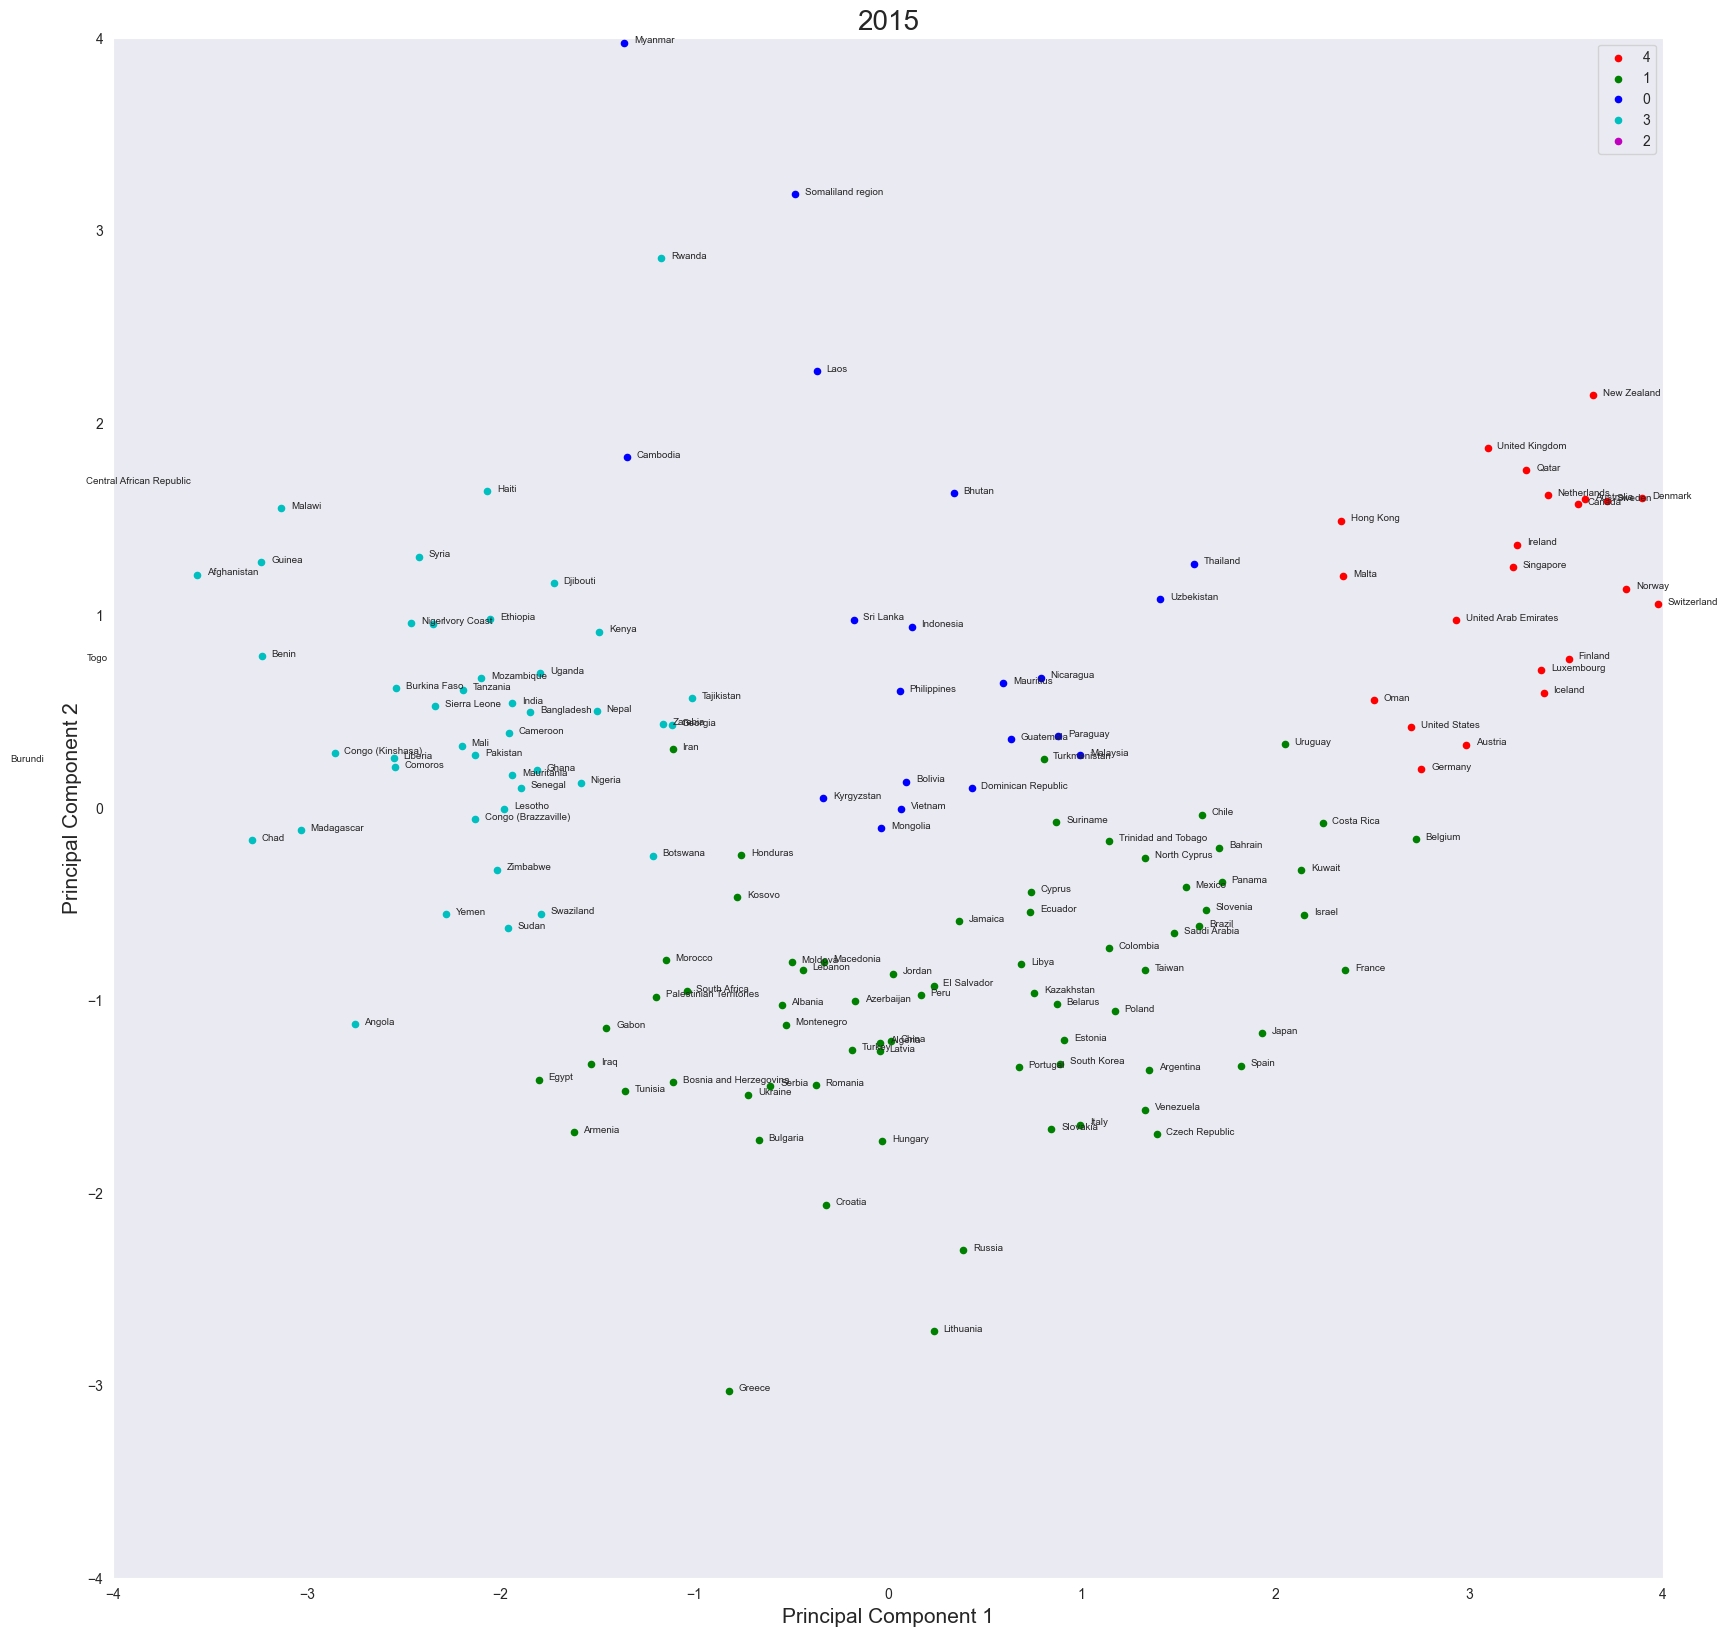

In [290]:
scatter_plot(final_df[final_df['year'] == '2015'], 2015)

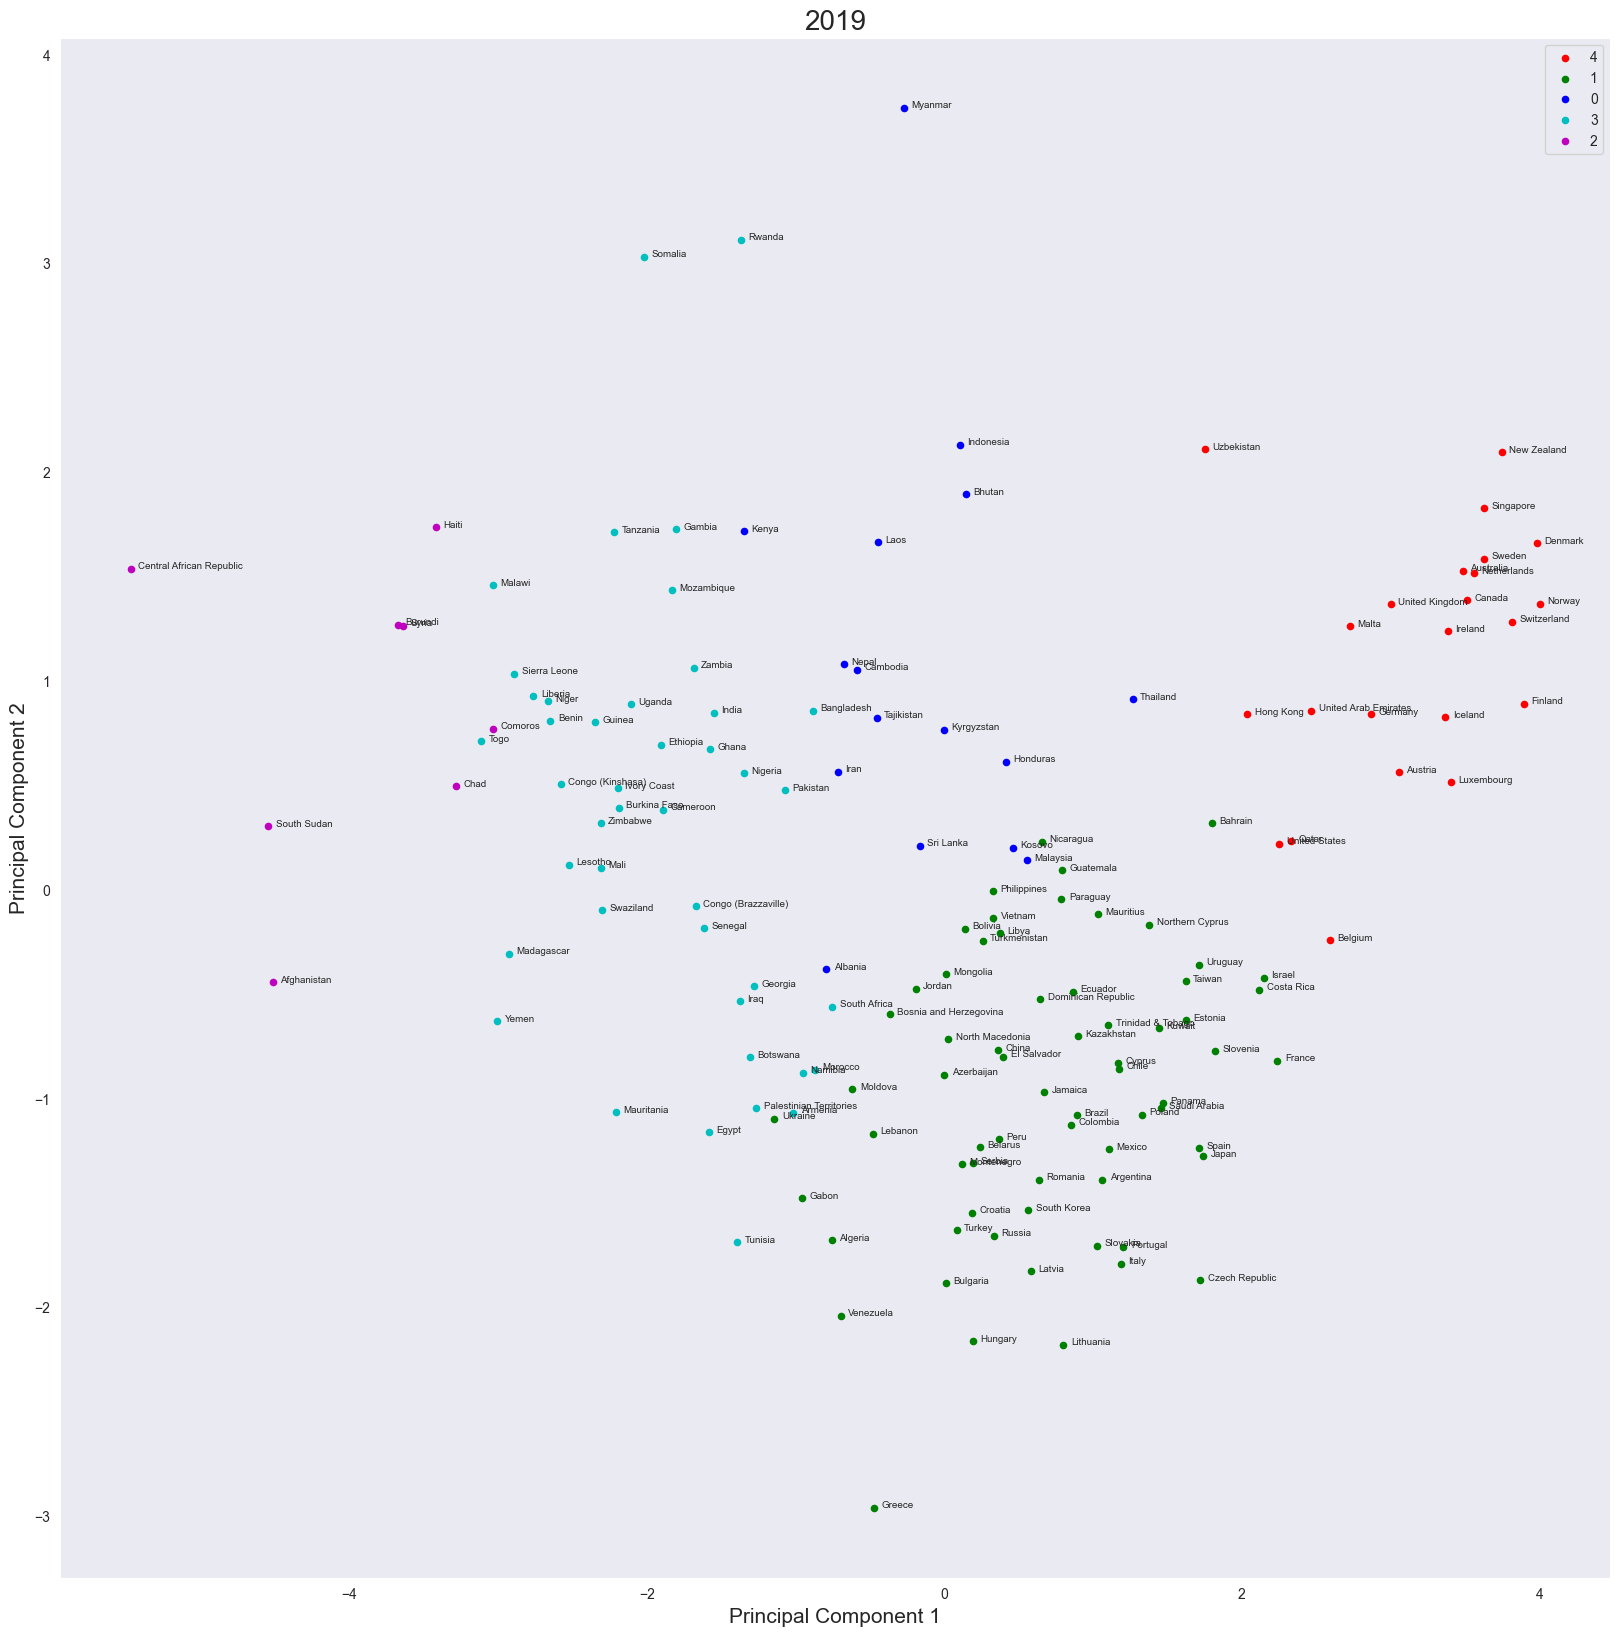

In [281]:
scatter_plot(final_df[final_df['year'] == '2019'], 2019)

In [282]:
centroids = pd.DataFrame(columns=['cluster', 'year', 'score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption'])

for i in range(len(centroids_2015)):
    centroid_2015 = centroids_2015.iloc[i]
    cluster = best_matching[i]
    
    centroids.loc[-1] = [cluster, 2015, centroid_2015['score'], centroid_2015['gdp_per_capita'], centroid_2015['social_support'], centroid_2015['life_expectancy'], centroid_2015['freedom'], centroid_2015['generosity'], centroid_2015['corruption']]
    centroids.index = centroids.index + 1
    centroids = centroids.sort_index()
    
for i in range(len(centroids_2019)):
    centroid_2019 = centroids_2019.iloc[i]
    cluster = i
    
    centroids.loc[-1] = [cluster, 2019, centroid_2019['score'], centroid_2019['gdp_per_capita'], centroid_2019['social_support'], centroid_2019['life_expectancy'], centroid_2019['freedom'], centroid_2019['generosity'], centroid_2019['corruption']]
    centroids.index = centroids.index + 1
    centroids = centroids.sort_index()

centroids

,cluster,year,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,4.0,2019.0,7.023609,1.229800,0.956241,1.095450,1.083813,0.945084,1.804265
1,3.0,2019.0,4.379581,-0.963784,-0.848334,-1.051496,-0.321277,-0.220068,-0.152987
2,2.0,2019.0,3.537000,-1.552243,-2.315622,-1.587487,-2.033091,0.676124,-0.194129
3,1.0,2019.0,5.820091,0.459664,0.537422,0.506122,-0.062985,-0.582944,-0.420189
4,0.0,2019.0,5.076250,-0.297661,-0.153753,-0.042823,0.581808,1.299455,-0.352135
5,4.0,2015.0,7.050136,1.302197,0.978578,1.082590,1.296048,1.056037,1.636706
6,0.0,2015.0,5.294200,-0.363555,0.204833,0.000654,0.778435,1.051380,-0.125146
7,1.0,2015.0,5.019333,0.209351,-0.187524,0.265004,-0.954797,-0.791685,-0.644509
8,3.0,2015.0,4.179696,-1.183898,-0.935197,-1.252881,-0.516087,-0.056074,-0.157862
9,1.0,2015.0,6.229054,0.707391,0.637351,0.677226,0.301798,-0.420416,-0.134437


In [283]:
centroid_features = centroids[['score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]

principal_components_centroids = pca.transform(centroid_features)
principal_df_centroids = pd.DataFrame(data = principal_components_centroids,
                columns = ['principal component 1', 'principal component 2'])
principal_df_centroids['year'] = centroids['year']
principal_df_centroids['cluster'] = centroids['cluster']
principal_df_centroids

,principal component 1,principal component 2,year,cluster
0,3.152429,1.120410,2019.0,4.0
1,-1.915435,0.339202,2019.0,3.0
2,-3.946934,0.866613,2019.0,2.0
3,0.685764,-0.978308,2019.0,1.0
4,-0.157612,1.070873,2019.0,0.0
5,3.240431,1.174430,2015.0,4.0
6,0.194313,1.012823,2015.0,0.0
7,-0.618028,-1.270769,2015.0,1.0
8,-2.289914,0.499270,2015.0,3.0
9,1.331079,-0.729151,2015.0,1.0


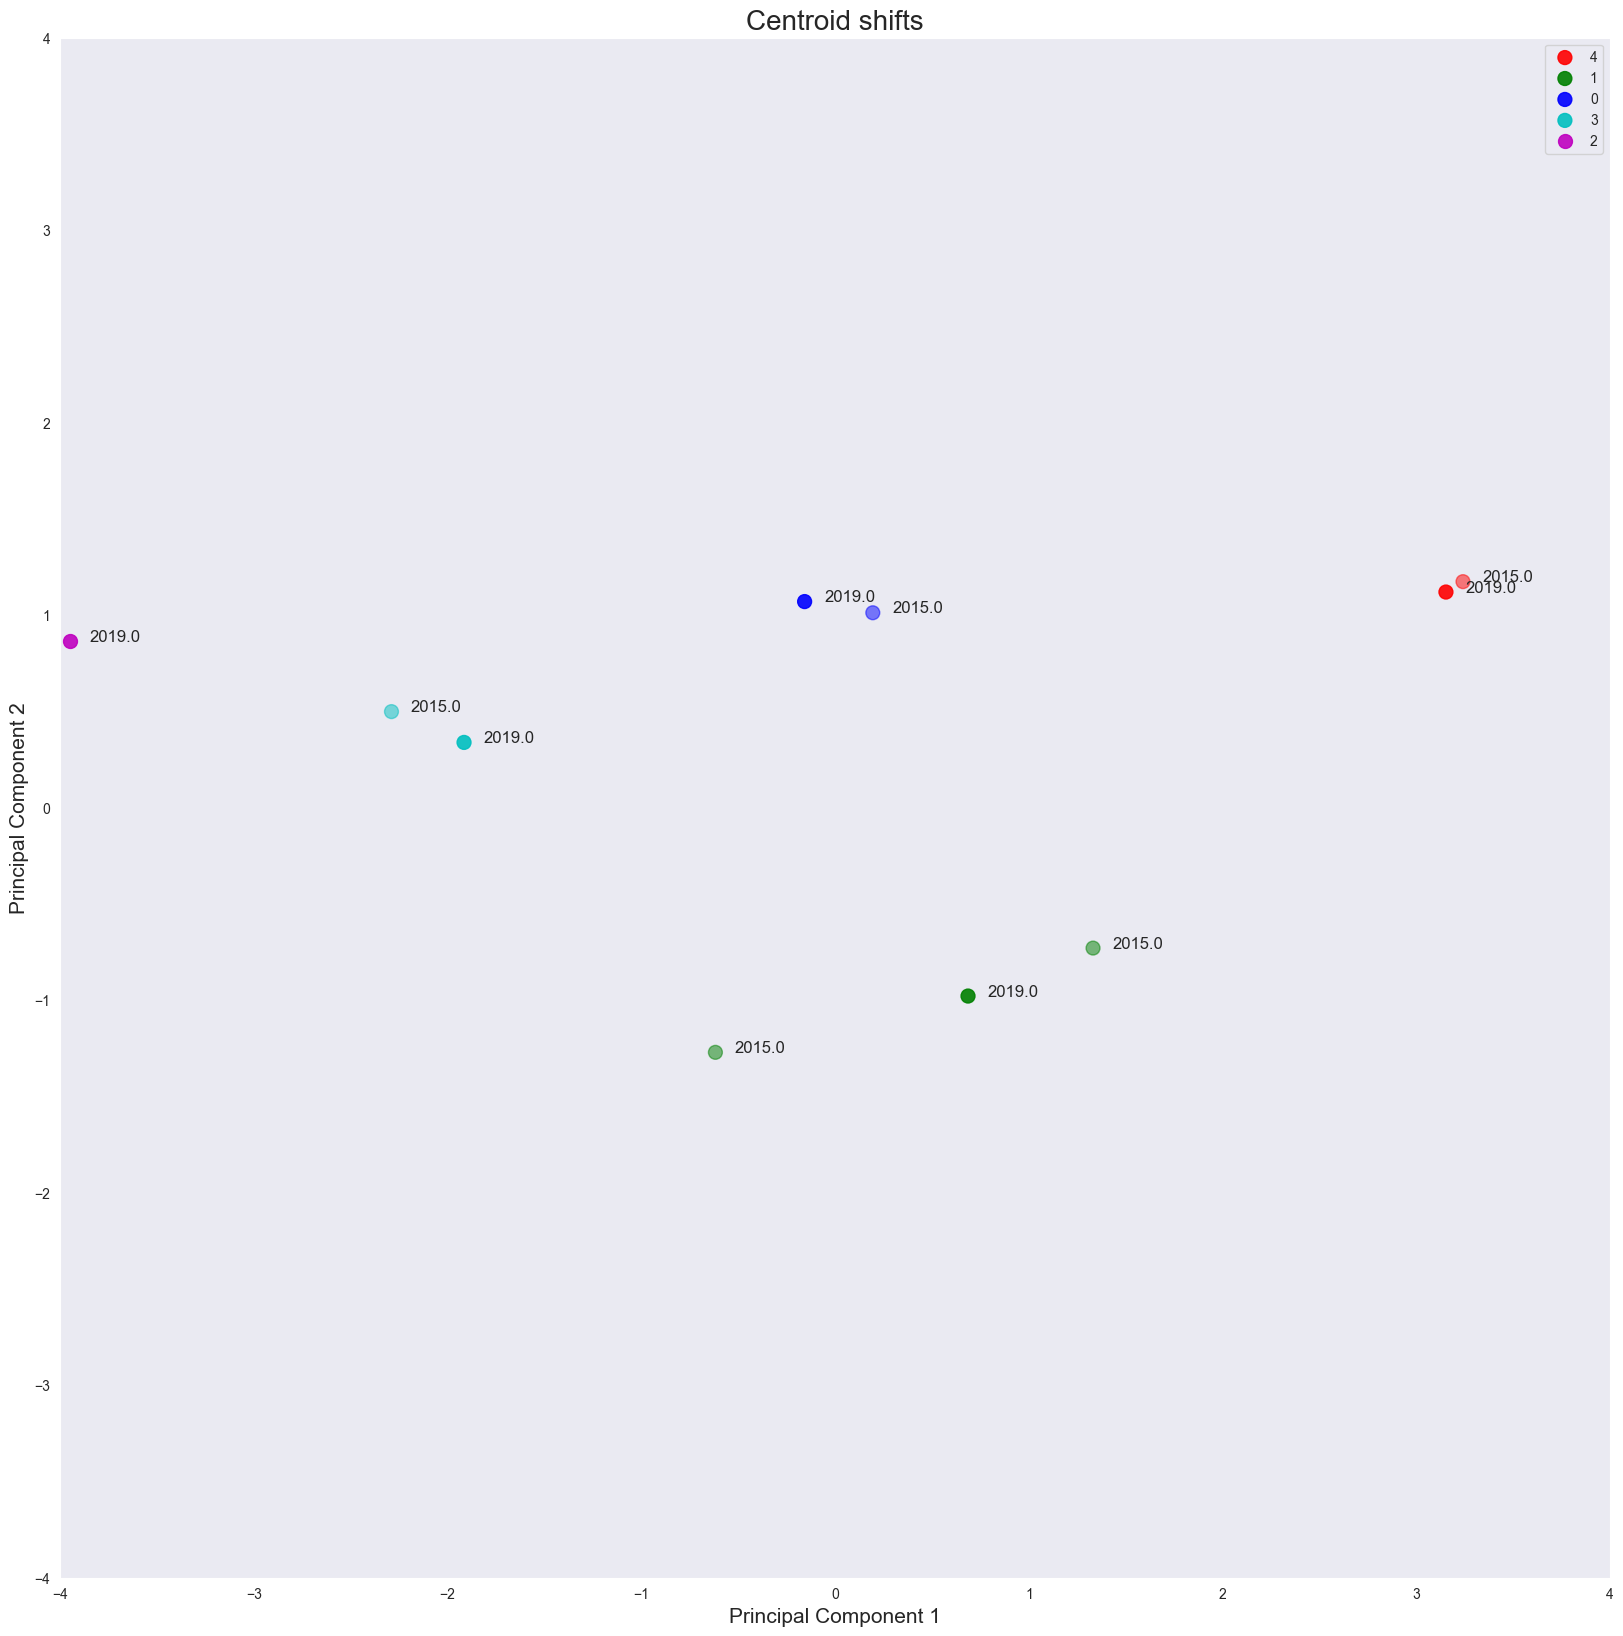

In [292]:
def label_points_centroids(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + .1, point['y'], str(point['val']), size=12)


def scatter_plot_centroids(df):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(f"Centroid shifts", fontsize=20)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    for target, color in zip(targets, colors):
        indicesToKeep = df['cluster'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c=color
                   , s=100
                   , alpha=(df.loc[indicesToKeep, 'year'] - 2010) / 10)

    label_points_centroids(df['principal component 1'], df['principal component 2'], df['year'], ax)

    ax.legend(targets)
    ax.grid()


scatter_plot_centroids(principal_df_centroids)


In [285]:
changes_df = pd.DataFrame(data_2015["country"])

changes_df["score"] = data_2019["score"] -  data_2015["score"]
changes_df["gdp_per_capita"] = data_2019["gdp_per_capita"] -  data_2015["gdp_per_capita"]
changes_df["social_support"] = data_2019["social_support"] -  data_2015["social_support"]
changes_df["life_expectancy"] = data_2019["life_expectancy"] -  data_2015["life_expectancy"]
changes_df["freedom"] = data_2019["freedom"] -  data_2015["freedom"]
changes_df["generosity"] = data_2019["generosity"] -  data_2015["generosity"]
changes_df["corruption"] = data_2019["corruption"] -  data_2015["corruption"]

changes_df

,country,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,Switzerland,0.182,-0.273754,-0.052070,-0.182450,-0.152728,-0.803874,0.684806
1,Iceland,0.039,0.067833,-0.292424,-0.167092,0.063562,-0.865867,3.183386
2,Denmark,0.027,0.273942,-0.109425,0.261335,0.003561,0.082780,-0.396671
3,Norway,-0.028,-0.328365,0.139739,0.210295,-0.215228,0.909926,-1.767962
4,Canada,0.061,0.041003,-0.170559,0.016136,-0.208570,-0.303153,0.431454
...,...,...,...,...,...,...,...,...
153,Rwanda,-0.262,0.154586,-1.514296,-0.688352,-3.823995,-0.194884,-4.308586
154,Benin,-0.257,-0.818864,-1.700849,-1.302319,-1.540309,0.958269,-0.272175
155,Syria,-0.153,-1.050121,-0.223363,-2.147975,-0.866410,-1.670921,-0.587562
156,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
pca = PCA(n_components=2)
changes_principal_components = pca.fit_transform(changes_df.drop(columns=["country"]).dropna())

changes_principal_df = pd.DataFrame(data=changes_principal_components
                                    , columns=['principal component 1', 'principal component 2'])

changes_principal_df = pd.concat([changes_principal_df, changes_df[['country']]], axis=1)

changes_principal_df = pd.merge(changes_principal_df, clusters_2019, left_on='country', right_on='country',
                                suffixes=('', '_y'))
changes_principal_df = changes_principal_df.rename(columns={"membership": "cluster"})
changes_principal_df

,principal component 1,principal component 2,country,cluster
0,-0.199868,-0.035673,Switzerland,4
1,1.066704,0.608935,Iceland,4
2,-0.171010,0.237429,Denmark,4
3,-0.391111,-0.468651,Norway,4
4,-0.096053,0.102851,Canada,4
...,...,...,...,...
144,-4.516695,-2.287540,Rwanda,3
145,-0.313495,-2.371569,Benin,3
146,-1.613876,-2.034667,Syria,2
147,NaN,NaN,Burundi,2


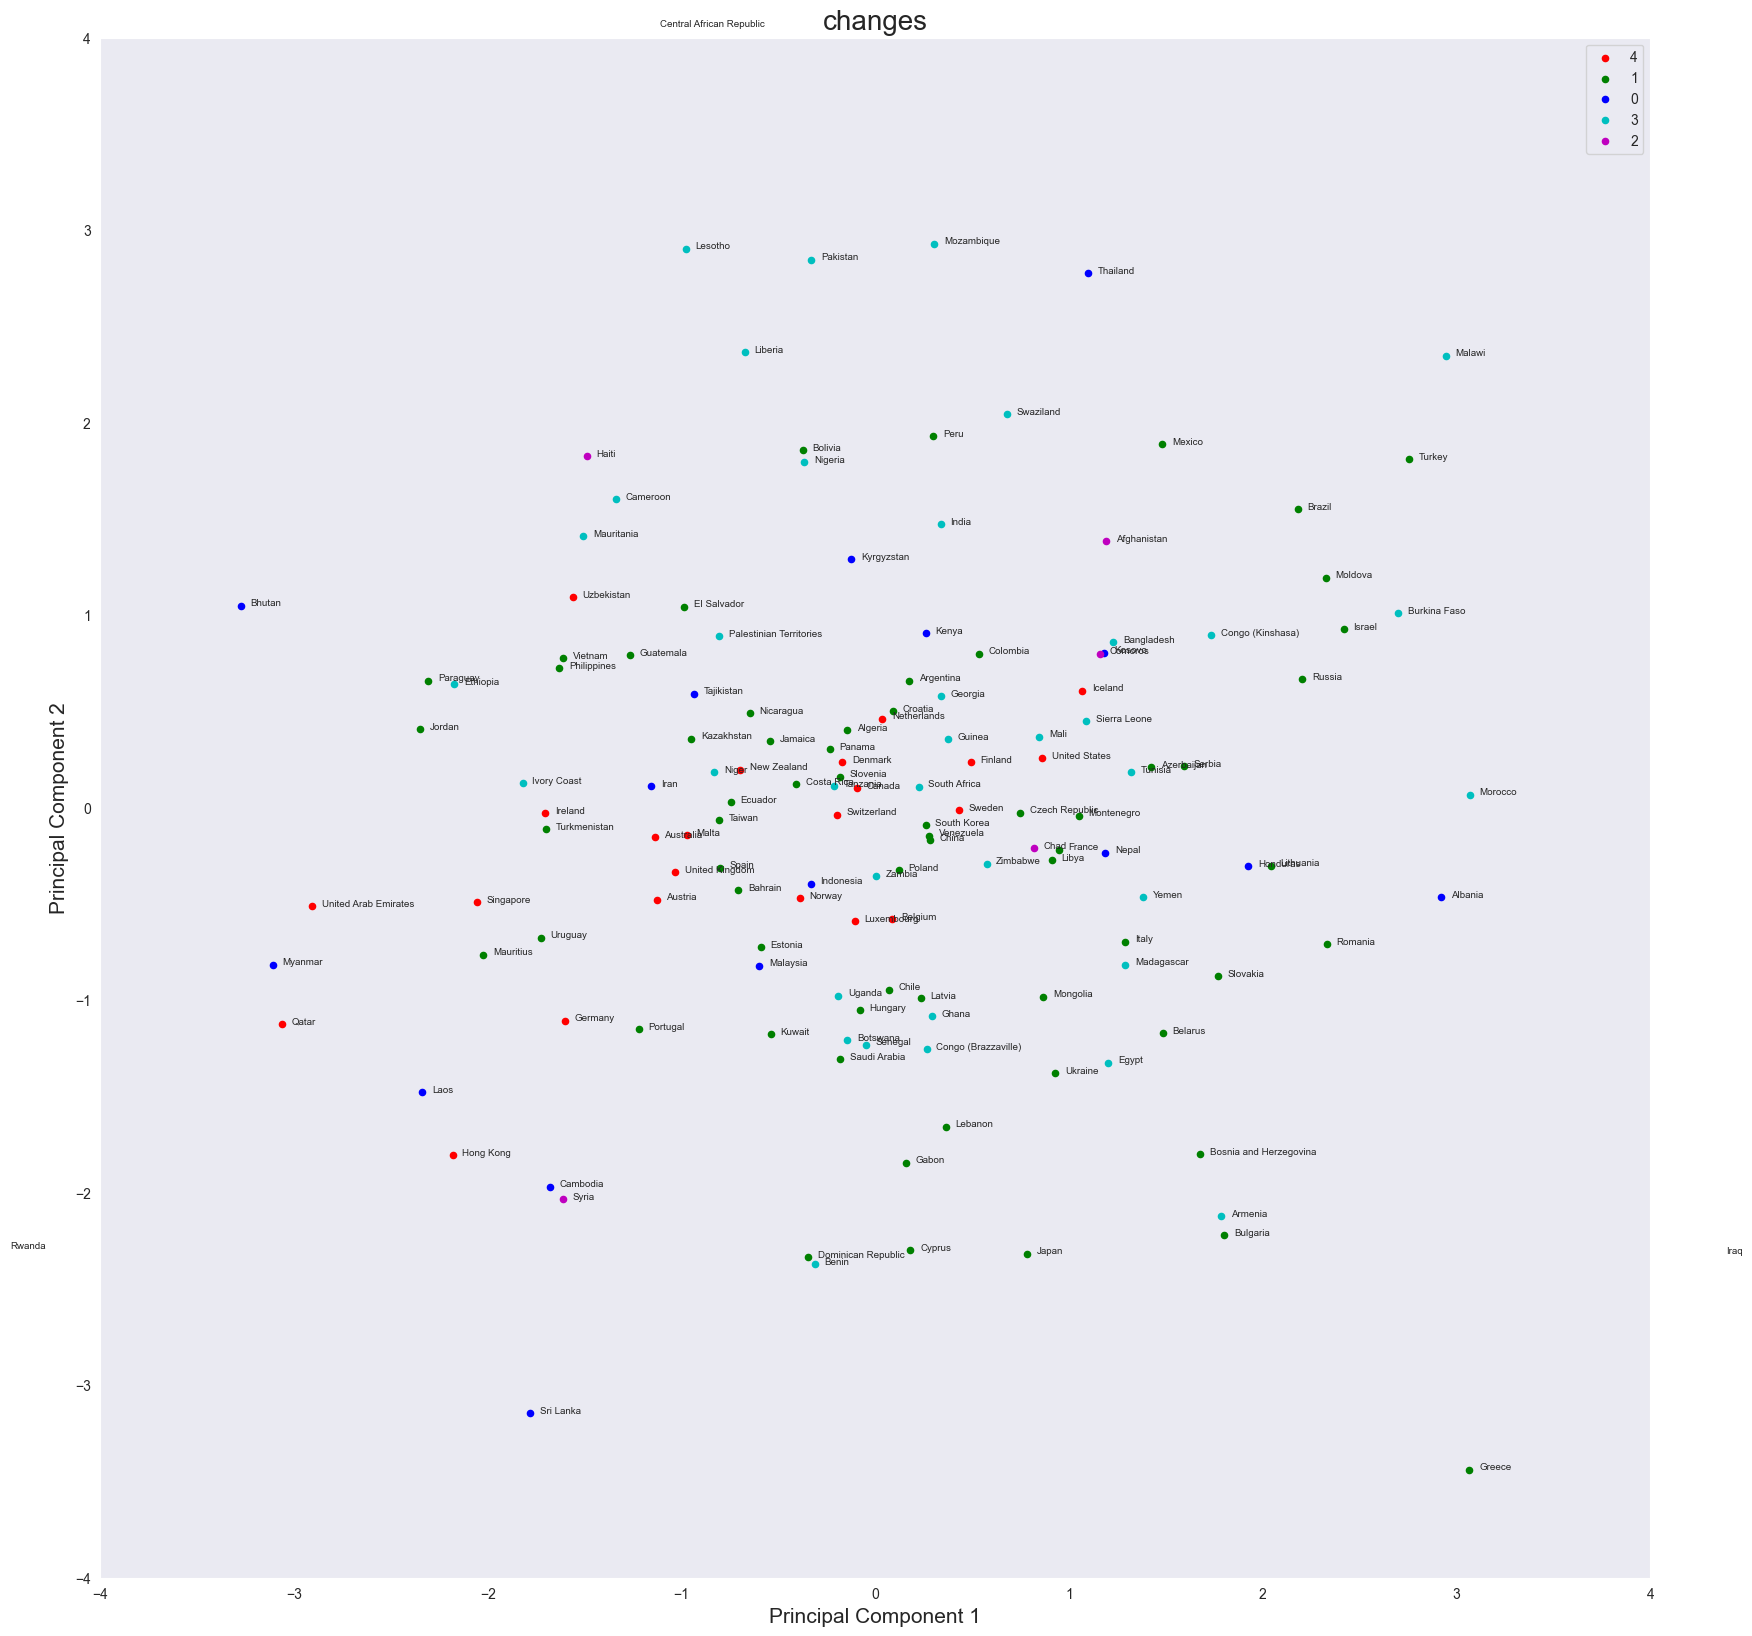

In [291]:
scatter_plot(changes_principal_df, "changes")